In [148]:
import                      os
import                      sys
import                      numpy                   as          np
import                      pandas                  as          pd
import                      matplotlib
import                      matplotlib.pyplot       as          plt
import                      seaborn                 as          sns
import                      plotly.express          as          px
import                      matplotlib.font_manager as          fm


from  sklearn.model_selection                      import       train_test_split
from  sklearn.preprocessing                        import       OneHotEncoder,StandardScaler
from  sklearn.metrics                              import       r2_score,mean_absolute_error,mean_absolute_percentage_error,root_mean_squared_error,root_mean_squared_log_error
from  tensorflow.keras.models                      import       Sequential
from  tensorflow.keras.layers                      import       Dense,Dropout,InputLayer,BatchNormalization
from  tensorflow.keras.optimizers                  import       Adam
from  tensorflow.keras.callbacks                   import       EarlyStopping
from  tensorflow.keras.callbacks                   import       ReduceLROnPlateau

#plt.rcParams["font.family"]=["Times New Roman"]
pd.set_option("display.max_columns",False)

# 1.1 Data Loading and data preprocessing

In [26]:
df                          = pd.read_csv("/content/sample_data/All_Districts_Combined.csv", encoding="latin1")
df["YEAR"]                  = df["YEAR"].astype(int)

In [27]:
new_df                      = df[df["YEAR"].isin([2022,2023])].reset_index(drop=True)
new_df.to_csv("analysis_file.csv")

In [28]:
def f(doy):
    if 1 <= doy <= 31:
        return "January"
    elif 32 <= doy <= 59:
        return "February"
    elif 60 <= doy <= 90:
        return "March"
    elif 91 <= doy <= 120:
        return "April"
    elif 121 <= doy <= 151:
        return "May"
    elif 152 <= doy <= 181:
        return "June"
    elif 182 <= doy <= 212:
        return "July"
    elif 213 <= doy <= 243:
        return "August"
    elif 244 <= doy <= 273:
        return "September"
    elif 274 <= doy <= 304:
        return "October"
    elif 305 <= doy <= 334:
        return "November"
    elif 335 <= doy <= 365:
        return "December"
    else:
        return "Invalid DOY"
new_df["Month"]             = new_df['DOY'].apply(lambda x:f(x))

In [29]:
new_df                      = new_df[new_df["Region"].isin(["Rangpur","Rajshahi","Dhaka","Khulna","Barishal","Chittagong","Sylhet","Sherpur","Kustia","Panchagarh"])]


In [30]:
grouped_data                = new_df.groupby("Region")[["Surface Shortwave Downward Irradiance","Profile Soil Moisture"]].agg(["mean"])
cols                        = grouped_data.columns
#grouped_data               = grouped_data.sort_values(by=cols[1],ascending=True)

/tmp/ipython-input-31-1987730834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=grouped_data.index,y=cols[1],palette="viridis",edgecolor="black",width=0.7,zorder=3)


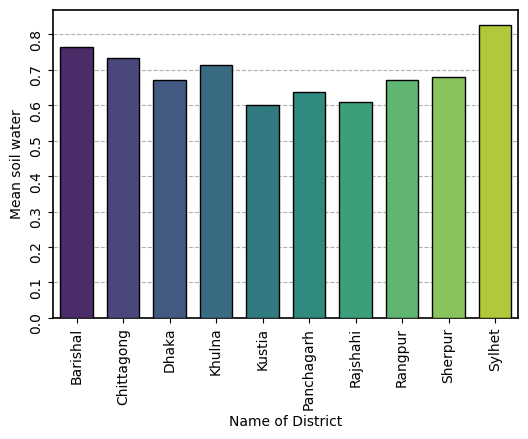

In [31]:
fig,axes                    = plt.subplots(figsize=(6,4))
sns.barplot(data=grouped_data,x=grouped_data.index,y=cols[1],palette="viridis",edgecolor="black",width=0.7,zorder=3)
ax                          = plt.gca()

for spine in ax.spines.values():
    spine.set_linewidth(1.2)

plt.tick_params(rotation=90)
plt.xlabel("Name of District")
plt.ylabel("Mean soil water")
plt.grid(which="major",axis="y",linewidth=0.8,linestyle="--",zorder=0)


os.makedirs("Results",exist_ok=True)

plt.savefig("Results/0.0_soil_moisture_districtwise.jpg",dpi=800)

/tmp/ipython-input-32-3380948411.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temporary_grp_data,x=temporary_grp_data.index,y="mean",ax=ax,palette="viridis",edgecolor="black",linewidth=0.3,zorder=3)
/tmp/ipython-input-32-3380948411.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temporary_grp_data,x=temporary_grp_data.index,y="mean",ax=ax,palette="viridis",edgecolor="black",linewidth=0.3,zorder=3)
/tmp/ipython-input-32-3380948411.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temporary_grp_data,x=temporary_g

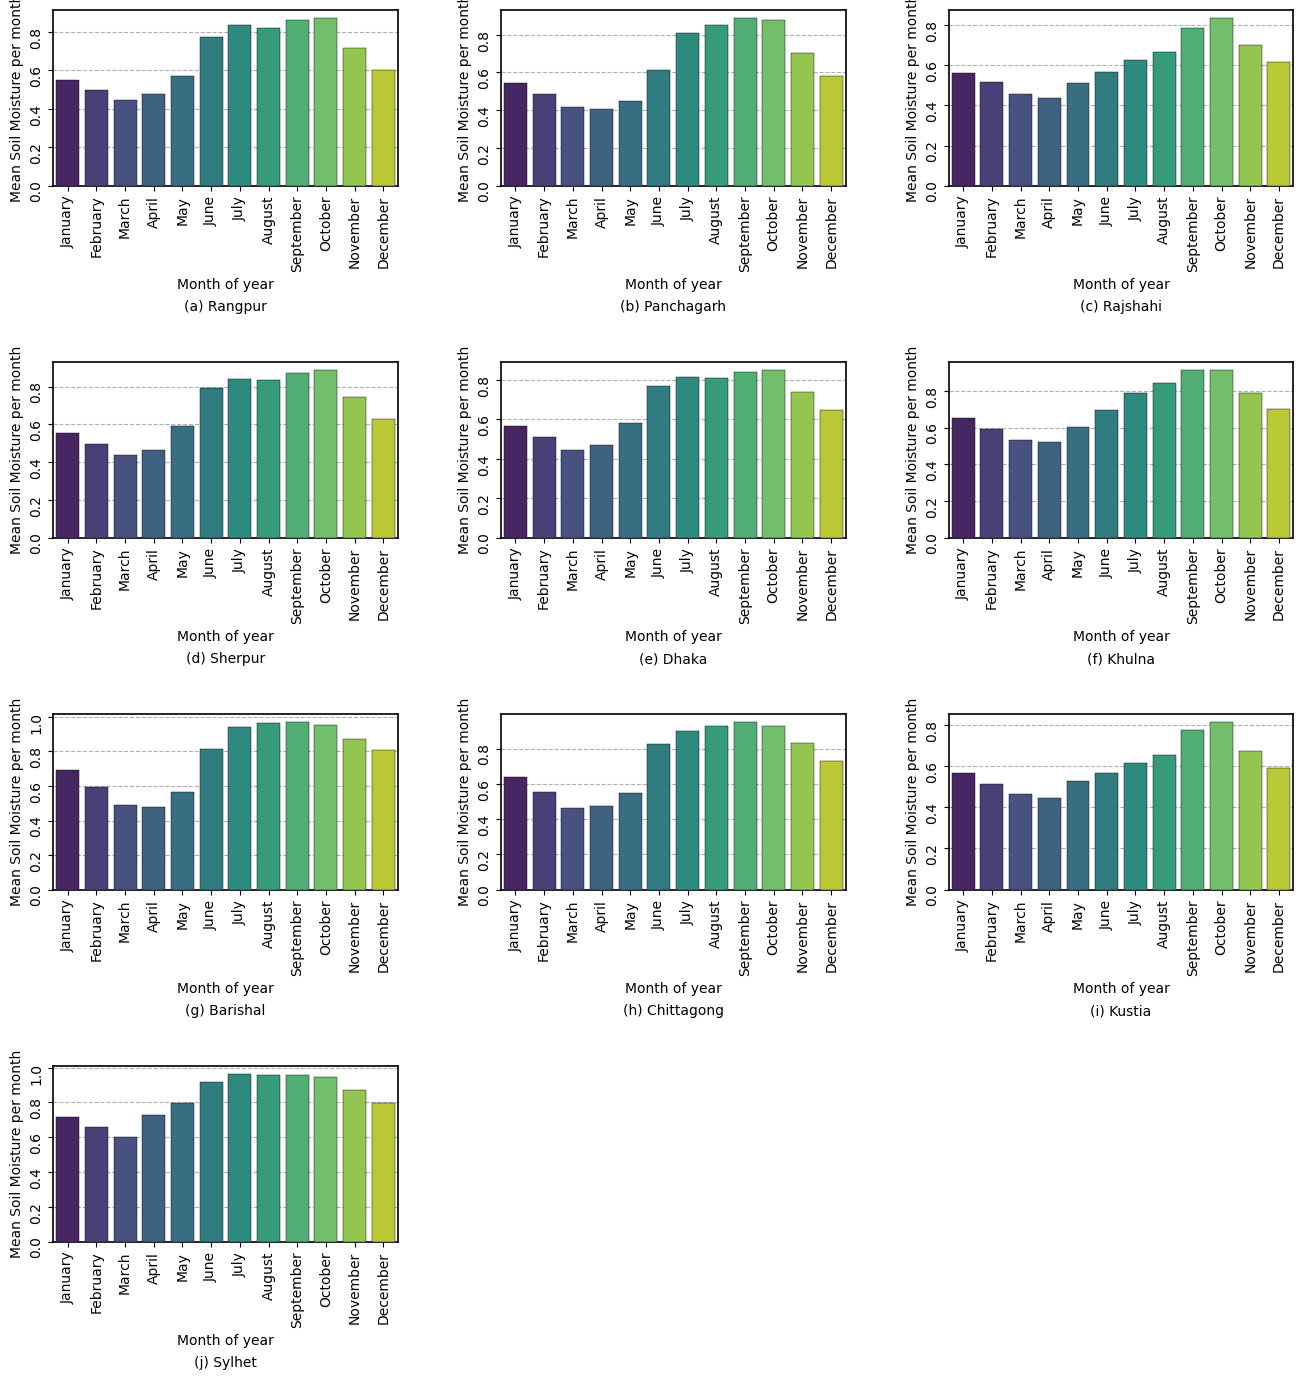

In [32]:
name_of_districts                  = list(new_df["Region"].unique())


fig,axes                           = plt.subplots(4,3,figsize=(16,16))
plt.subplots_adjust(wspace=0.3,hspace=1)
axes                               = axes.flatten()
list_1                             = ["a","b","c","d","e","f","g","h","i","j"]

for i,ax,sl in zip(range(len(name_of_districts)),axes,list_1):
    temporary_ds                   = new_df[new_df['Region']==name_of_districts[i]]
    temporary_grp_data             = temporary_ds.groupby('Month')['Profile Soil Moisture'].agg(["mean"])
    month_order                    = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    temporary_grp_data.index       = pd.CategoricalIndex(temporary_grp_data.index, categories=month_order, ordered=True)
    temporary_grp_data             = temporary_grp_data.sort_index()

    sns.barplot(data=temporary_grp_data,x=temporary_grp_data.index,y="mean",ax=ax,palette="viridis",edgecolor="black",linewidth=0.3,zorder=3)
    ax.tick_params(rotation=90)
    ax.set_xlabel("Month of year")
    ax.set_ylabel("Mean Soil Moisture per month")
    ax.grid(which="major",axis="y",linewidth=0.8,linestyle="--",zorder=0)
    ax.text(0.5, -0.65, f"({sl}) {name_of_districts[i]}", transform=ax.transAxes,ha='center', va='top', fontsize=10)
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

for ax in range(10,12):
    fig.delaxes(axes[ax])

os.makedirs("Results",exist_ok=True)

plt.savefig("Results/1.0_soil_moisture.jpg",dpi=800)

# 2.1 Feature Engineering

In [33]:
new_df["day_sin"]               = np.sin(2 * np.pi * df["DOY"] / 365)
new_df["day_cos"]               = np.cos(2 * np.pi * df["DOY"] / 365)
new_df["moisture_3day_avg"]     = df.groupby("Region")["Profile Soil Moisture"].rolling(3).mean().reset_index(0, drop=True)


winter                          = ["November","December","January","February"]
summer                          = ["March","April","May","June"]
monsoon                         = ["August","September","October"]



def f(x):
    if x in winter:
        return "Winter"
    elif x in summer:
        return "Summer"

    else:
        return "Monsoon"


new_df["season"]                = new_df["Month"].apply(lambda x:f(x))

In [34]:
new_df.dropna(inplace=True)

<Axes: >

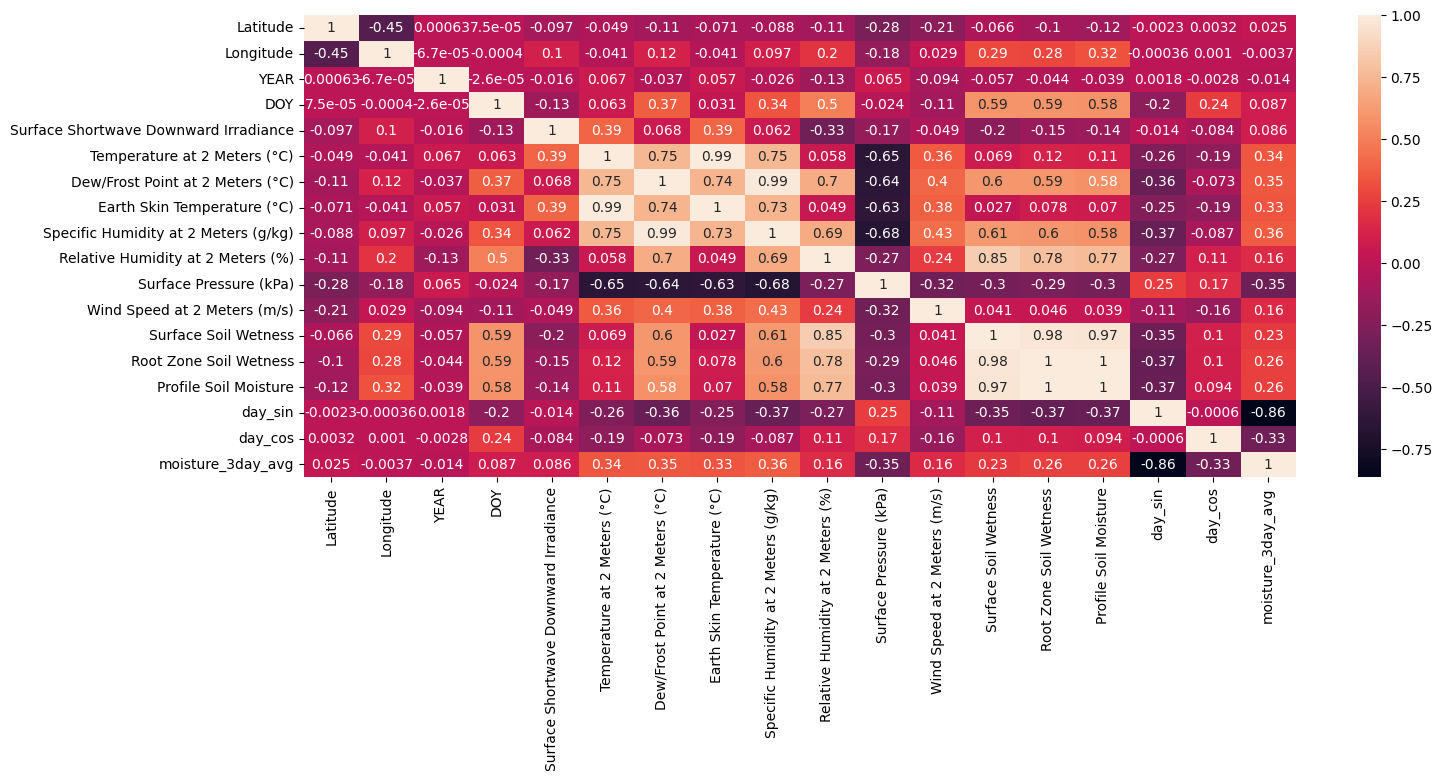

In [35]:
numerical_cols                  = new_df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols                = new_df.select_dtypes("object").columns.tolist()

fig,axes                        = plt.subplots(figsize=(16,6))

sns.heatmap(new_df[numerical_cols].corr(),annot=True)


In [36]:
encoder                         = OneHotEncoder(sparse_output=False)
encoded_array                   = encoder.fit_transform(new_df[categorical_cols])
encoded_cols                    = encoder.get_feature_names_out(categorical_cols)
encoded_df                      = pd.DataFrame(encoded_array,columns=encoded_cols,index=new_df.index)

new_df_1                        = pd.concat([new_df,encoded_df],axis=1)
new_df_1                        = new_df_1.drop(categorical_cols,axis=1)

In [37]:
target_col                      = ["Profile Soil Moisture",'Root Zone Soil Wetness','Surface Soil Wetness']
input_col                       = [col for col in new_df_1.columns if col not in target_col]
X                               = new_df_1[input_col]
y                               = new_df_1[target_col]


In [38]:
X_scaler                        = StandardScaler()
y_scaler                        = StandardScaler()
X_train,X_test,y_train,y_test   = train_test_split(X,y,shuffle=True,random_state=42,train_size=0.8)

X_train_scaled                  = pd.DataFrame(X_scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled                   = pd.DataFrame(X_scaler.transform(X_test),columns=X_test.columns)

y_train_scaled                  = pd.DataFrame(y_scaler.fit_transform(y_train),columns=y_train.columns)
y_test_scaled                   = pd.DataFrame(y_scaler.transform(y_test),columns=y_test.columns)

# 3.0 Model Training

In [72]:
ann_model                      = Sequential([

    InputLayer(shape=(X_test_scaled.shape[1],)),
    #Dense(256,activation="relu"),
    #Dropout(0.3),
    #BatchNormalization(),
    #Dense(128,activation="relu"),
    #Dropout(0.3),
    #BatchNormalization(),
    Dense(64,activation="relu"),
    Dropout(0.3),
    BatchNormalization(),
    Dense(32,activation="relu"),
    Dropout(0.3),
    Dense(3),


])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)
earlystopping                  = EarlyStopping(patience=20,restore_best_weights=True)
ann_model.compile(loss="mean_absolute_error",optimizer=Adam(learning_rate=0.0005),metrics=["mse"])
history_ann                    = ann_model.fit(X_train_scaled,y_train_scaled,epochs=1000,validation_data=(X_test_scaled,y_test_scaled),callbacks=[earlystopping, lr_scheduler])

Epoch 1/1000
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0781 - mse: 1.8253 - val_loss: 0.4576 - val_mse: 0.3155 - learning_rate: 5.0000e-04
Epoch 2/1000
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6702 - mse: 0.7190 - val_loss: 0.3387 - val_mse: 0.1845 - learning_rate: 5.0000e-04
Epoch 3/1000
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5508 - mse: 0.4827 - val_loss: 0.2995 - val_mse: 0.1452 - learning_rate: 5.0000e-04
Epoch 4/1000
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4944 - mse: 0.3866 - val_loss: 0.2757 - val_mse: 0.1225 - learning_rate: 5.0000e-04
Epoch 5/1000
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4449 - mse: 0.3161 - val_loss: 0.2627 - val_mse: 0.1120 - learning_rate: 5.0000e-04
Epoch 6/1000
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4091 - mse: 0.2671 - val_loss: 0.2532 - val_mse: 0.1033 - learning_rate: 5.0000e-04
Epoch 7/1000
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3764 - mse: 0.2298 - val_loss: 0.2447 - val_mse:

In [73]:
y_pred = ann_model.predict(X_test_scaled)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [89]:
prediction      = pd.DataFrame(y_scaler.inverse_transform(y_pred))
act             = pd.DataFrame(y_scaler.inverse_transform(y_test_scaled))
conc_df         = pd.concat([act,prediction],axis=1)
columns         = ["Profile Soil Moisture",'Root Zone Soil Wetness','Surface Soil Wetness',"predicted_profile_soil","predicted_root_zone","predicted_surface_soil"]
conc_df.columns = columns

0.9621411434549435

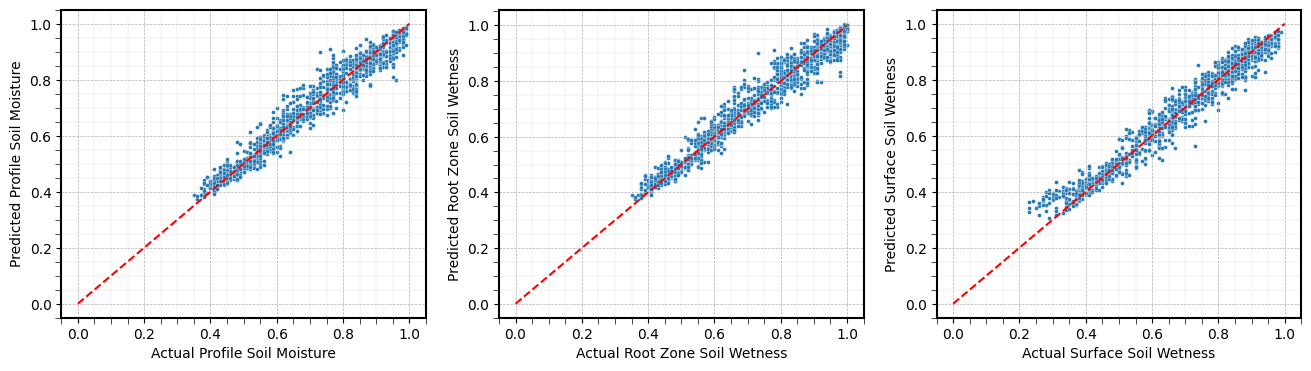

In [149]:
fig, axes        = plt.subplots(1, 3, figsize=(16, 4))
concated_df_cols = conc_df.columns
r_2_list         = []
mae_list         = []
mape_list        = []
rmse_list        = []
rmsel_list       = []

for i in range(3):
    sns.scatterplot(data=conc_df, x=concated_df_cols[i], y=concated_df_cols[i + 3], s=8, ax=axes[i])
    r2    = r2_score(conc_df[concated_df_cols[i]],conc_df[concated_df_cols[i + 3]])
    mae   = mean_absolute_error(conc_df[concated_df_cols[i]],conc_df[concated_df_cols[i + 3]])
    mape  = mean_absolute_percentage_error(conc_df[concated_df_cols[i]],conc_df[concated_df_cols[i + 3]])
    rmse  = root_mean_squared_error(conc_df[concated_df_cols[i]],conc_df[concated_df_cols[i + 3]])
    rmsel = root_mean_squared_log_error(conc_df[concated_df_cols[i]],conc_df[concated_df_cols[i + 3]])

    r_2_list.append(r2)
    mae_list.append(mae)
    mape_list.append(mape)
    rmse_list.append(rmse)
    rmsel_list.append(rmsel)



    for spine in axes[i].spines.values():
      spine.set_linewidth(1.5)


    axes[i].plot([0, 1], [0, 1], 'r--')
    axes[i].set_xlabel(f"Actual {concated_df_cols[i]}")
    axes[i].set_ylabel(f"Predicted {concated_df_cols[i]}")
    #axes[i].text(0.5,-0.17,f"Predicted vs Actual {concated_df_cols[i]}")
    axes[i].minorticks_on()
    axes[i].tick_params(which='minor', length=4, width=0.5)
    axes[i].grid(which="major", axis="both", linewidth=0.5, linestyle="--")
    axes[i].grid(which="minor", axis="both", linewidth=0.3, linestyle=":")


